# Buffer Stock Model

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import numba as nb
import matplotlib.pyplot as plt


# load the BufferStockModel module
from BufferStockModel import BufferStockModelClass

# for timing
from consav.misc import elapsed

nb.set_num_threads(1) # use a single thread for clarity

# Solve with NEGM

Load Buffer Stock Model to be solved with NEGM:

In [2]:
model_negm = BufferStockModelClass(name='baseline',par={'solmethod':'egm'})

Solve the model with NEGM:

In [3]:
model_negm.solve()

 t = 59 solved in 1.7 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 7.3 secs (w: 4.8 secs)
 t = 58 solved in 0.7 secs (w: 0.7 secs)
 t = 58 solved in 0.9 secs (w: 0.8 secs)
 t = 57 solved in 0.9 secs (w: 0.9 secs)
 t = 57 solved in 0.9 secs (w: 0.8 secs)
 t = 57 solved in 0.7 secs (w: 0.7 secs)
 t = 56 solved in 1.0 secs (w: 1.0 secs)
 t = 56 solved in 0.8 secs (w: 0.8 secs)
 t = 56 solved in 1.0 secs (w: 1.0 secs)
 t = 55 solved in 1.3 secs (w: 1.3 secs)
 t = 55 solved in 0.7 secs (w: 0.7 secs)
 t = 55 solved in 1.2 secs (w: 1.2 secs)
 t = 54 solved in 1.5 secs (w: 1.4 secs)
 t = 54 solved in 2.4 secs (w: 2.3 secs)
 t = 54 solved in 1.2 secs (w: 1.2 secs)
 t = 53 solved in 2.0 secs (w: 1.9 secs)
 t = 53 solved in 1.2 secs (w: 1.2 secs)
 t = 53 solved in 1.6 secs (w: 1.4 secs)
 t = 52 solved in 1.2 secs (w: 1.1 secs)
 t = 52 solved in 1.2 secs (w: 1.1 secs)
 t = 52 solved in 1.8 secs (w: 1.8 secs)
 t = 51 solved in 1.0 secs (w: 1.0 secs)
 t = 51 solved in

Simulate NEGM-solved model with updated simulate function `simulate_rand`, that assigns different beta values to households:

In [4]:
model_negm.simulate()

model simulated in 2.9 secs


In [5]:
model_negm.simulate_rand()

model simulated in 3.1 secs


Plot lifecycles of model solved with NEGM:

In [ ]:
model_negm.lifecycle()

## Various checks

Below checks simulation values for different values of beta (households):

In [ ]:
# This saves simualtes the model and put simulation results in model.sim
model_negm.simulate()

In [ ]:
model_negm.beta_check()

In a single graph:

In [ ]:
model_negm.beta_check_simple()

# Tax shocks

## Transitory Anticipated Tax Increase

Create a copy of the original model solve with NEGM and implement anticipated transitory tax increase in period 21:

In [6]:
model_negm_trans10pct = model_negm.copy()
model_negm_trans10pct.par.tax_rate_vec[20] = model_negm.par.tax_rate_vec[20]*1.1

Check tax array to see that a transitory shock has been implemented:

In [7]:
# ensuring tax has hikened
model_negm_trans10pct.par.tax_rate_vec

array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.33, 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 ])

Solve and simulate new model with anticipated transitory shock (using ´simulate_rand´ that assigns different beta values to different households): 

In [8]:
model_negm_trans10pct.solve()
model_negm_trans10pct.simulate()
model_negm_trans10pct.simulate_rand()

 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 0.8 secs (w: 0.8 secs)
 t = 58 solved in 0.7 secs (w: 0.7 secs)
 t = 58 solved in 0.8 secs (w: 0.8 secs)
 t = 57 solved in 1.0 secs (w: 1.0 secs)
 t = 57 solved in 0.7 secs (w: 0.7 secs)
 t = 57 solved in 0.9 secs (w: 0.9 secs)
 t = 56 solved in 1.2 secs (w: 1.2 secs)
 t = 56 solved in 1.2 secs (w: 1.1 secs)
 t = 56 solved in 1.4 secs (w: 1.4 secs)
 t = 55 solved in 0.8 secs (w: 0.8 secs)
 t = 55 solved in 0.9 secs (w: 0.9 secs)
 t = 55 solved in 0.9 secs (w: 0.9 secs)
 t = 54 solved in 0.9 secs (w: 0.9 secs)
 t = 54 solved in 1.0 secs (w: 1.0 secs)
 t = 54 solved in 1.1 secs (w: 1.1 secs)
 t = 53 solved in 1.1 secs (w: 1.1 secs)
 t = 53 solved in 0.9 secs (w: 0.9 secs)
 t = 53 solved in 1.0 secs (w: 1.0 secs)
 t = 52 solved in 0.9 secs (w: 0.9 secs)
 t = 52 solved in 1.0 secs (w: 0.9 secs)
 t = 52 solved in 1.2 secs (w: 1.2 secs)
 t = 51 solved in 1.0 secs (w: 0.9 secs)
 t = 51 solved in

/var/folders/qc/t65gjfgx5dq1dyhtrhctn2q80000gn/T/ipykernel_83930/2059391379.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


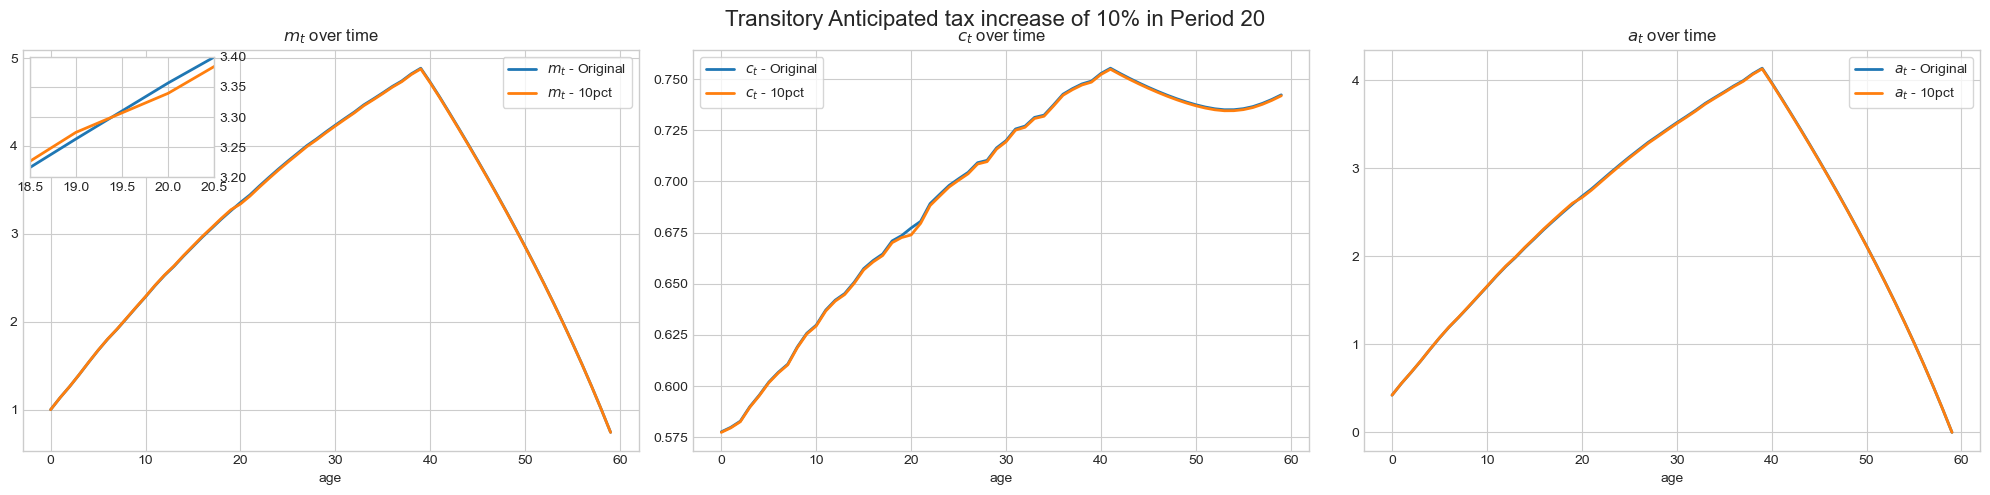

In [11]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_trans10pct = model_negm_trans10pct.sim

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Transitory Anticipated tax increase of 10% in Period 20", fontsize=16)

age = np.arange(par.T)

for i, (simvar, simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar+'_rand')
    simdata_trans10pct = getattr(sim_trans10pct, simvar+'_rand')
    axs[i].plot(age, np.mean(simdata, axis=1), lw=2, label=f'{simvarlatex} - Original')
    axs[i].plot(age, np.mean(simdata_trans10pct, axis=1), lw=2, label=f'{simvarlatex} - 10pct')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

    # create zoom-in inset plot on the first graph
    if i == 0:
        axins = inset_axes(axs[i], width="30%", height="30%", loc='upper left')  # adjust size and position as needed
        axins.plot(age, np.mean(simdata, axis=1), lw=2)
        axins.plot(age, np.mean(simdata_trans10pct, axis=1), lw=2)

        # specify the limits for the zoomed-in plot
        axins.set_xlim(18.5, 20.5)
        axins.set_ylim(3.2,3.4)  # adjust as needed

        # Move labels to right
        axins.yaxis.tick_right()
        axins.yaxis.set_label_position("right")

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()


## Permanent Anticipated Tax Increase

Create a copy of the original model solve with NEGM and anticipated permanent tax increase in period 21:

In [12]:
model_negm_10pct = model_negm.copy()
model_negm_10pct.par.tax_rate_vec[20:] = model_negm.par.tax_rate_vec[20:]*1.1

Check tax array to see that a permanent increase has been implemented:

In [13]:
model_negm_10pct.par.tax_rate_vec

array([0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 ,
       0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.3 , 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33,
       0.33, 0.33, 0.33, 0.33, 0.33])

Solve and simulate new model with permanent shock (using ´simulate_rand´ that assigns different beta values to different households): 

In [14]:
model_negm_10pct.solve()
model_negm_10pct.simulate()
model_negm_10pct.simulate_rand()

 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 59 solved in 0.0 secs
 t = 58 solved in 1.4 secs (w: 1.4 secs)
 t = 58 solved in 1.5 secs (w: 1.5 secs)
 t = 58 solved in 2.0 secs (w: 1.9 secs)
 t = 57 solved in 1.7 secs (w: 1.7 secs)
 t = 57 solved in 1.3 secs (w: 1.2 secs)
 t = 57 solved in 1.4 secs (w: 1.3 secs)
 t = 56 solved in 1.9 secs (w: 1.8 secs)
 t = 56 solved in 1.3 secs (w: 1.3 secs)
 t = 56 solved in 1.5 secs (w: 1.5 secs)
 t = 55 solved in 1.1 secs (w: 1.1 secs)
 t = 55 solved in 1.7 secs (w: 1.7 secs)
 t = 55 solved in 1.0 secs (w: 0.9 secs)
 t = 54 solved in 1.2 secs (w: 1.2 secs)
 t = 54 solved in 1.1 secs (w: 1.0 secs)
 t = 54 solved in 1.2 secs (w: 1.2 secs)
 t = 53 solved in 1.5 secs (w: 1.5 secs)
 t = 53 solved in 0.8 secs (w: 0.7 secs)
 t = 53 solved in 0.7 secs (w: 0.7 secs)
 t = 52 solved in 0.9 secs (w: 0.9 secs)
 t = 52 solved in 0.8 secs (w: 0.8 secs)
 t = 52 solved in 0.9 secs (w: 0.8 secs)
 t = 51 solved in 0.8 secs (w: 0.7 secs)
 t = 51 solved in

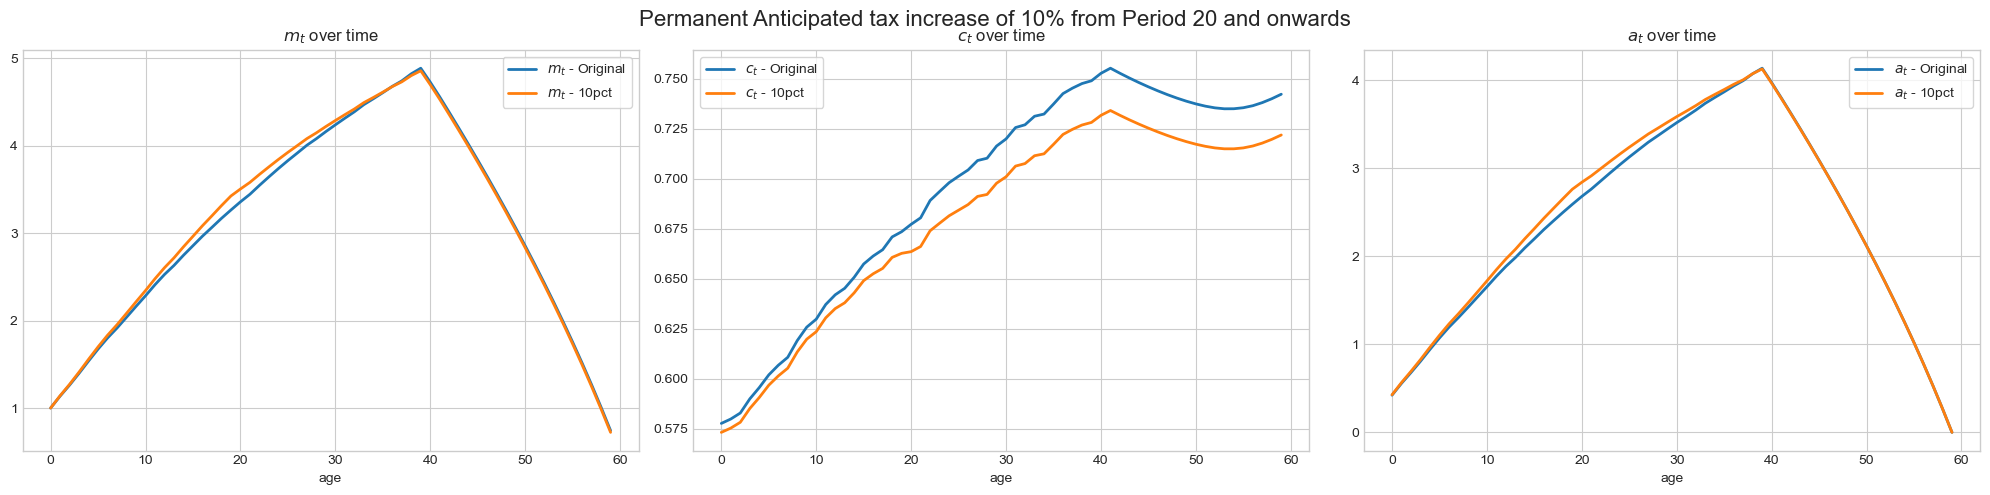

In [15]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_10pct = model_negm_10pct.sim

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Anticipated tax increase of 10% from Period 20 and onwards", fontsize=16)

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim,simvar+'_rand')
    simdata_10pct = getattr(sim_10pct,simvar+'_rand')
    axs[i].plot(age,np.mean(simdata,axis=1),lw=2,label=f'{simvarlatex} - Original')
    axs[i].plot(age,np.mean(simdata_10pct,axis=1),lw=2,label=f'{simvarlatex} - 10pct')

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

## Uanticipated Tax Increase

Create a copy of the original model solve with NEGM and *unanticipated* permanent tax increase in period 21:

In [16]:
model_unanticipated10pt = model_negm.copy()

Replace the periods after 20 from the old_tax simulation with the new_tax simulation

In [17]:
for var in ['m', 'c', 'a']:
    sim_old = getattr(model_negm.sim, var+'_rand')
    sim_new = getattr(model_negm_10pct.sim, var+'_rand')
    sim_combined = np.copy(sim_old)  # Create a copy of the old simulation
    sim_combined[20:] = sim_new[20:]  # Replace the periods after 20 with the new simulation

    # Set the combined simulation in the original model
    setattr(model_unanticipated10pt.sim, f'{var}_rand', sim_combined)

Checking They Jump to Correct (New) Optimal Path:

In [18]:
print(
    model_negm.sim.c_rand[10,0]
    ,model_unanticipated10pt.sim.c_rand[10,0]
    ,model_unanticipated10pt.sim.c_rand[30,0]
    ,model_negm_10pct.sim.c_rand[30,0]
)

0.30291422148607333 0.30291422148607333 0.4523592561974992 0.4523592561974992


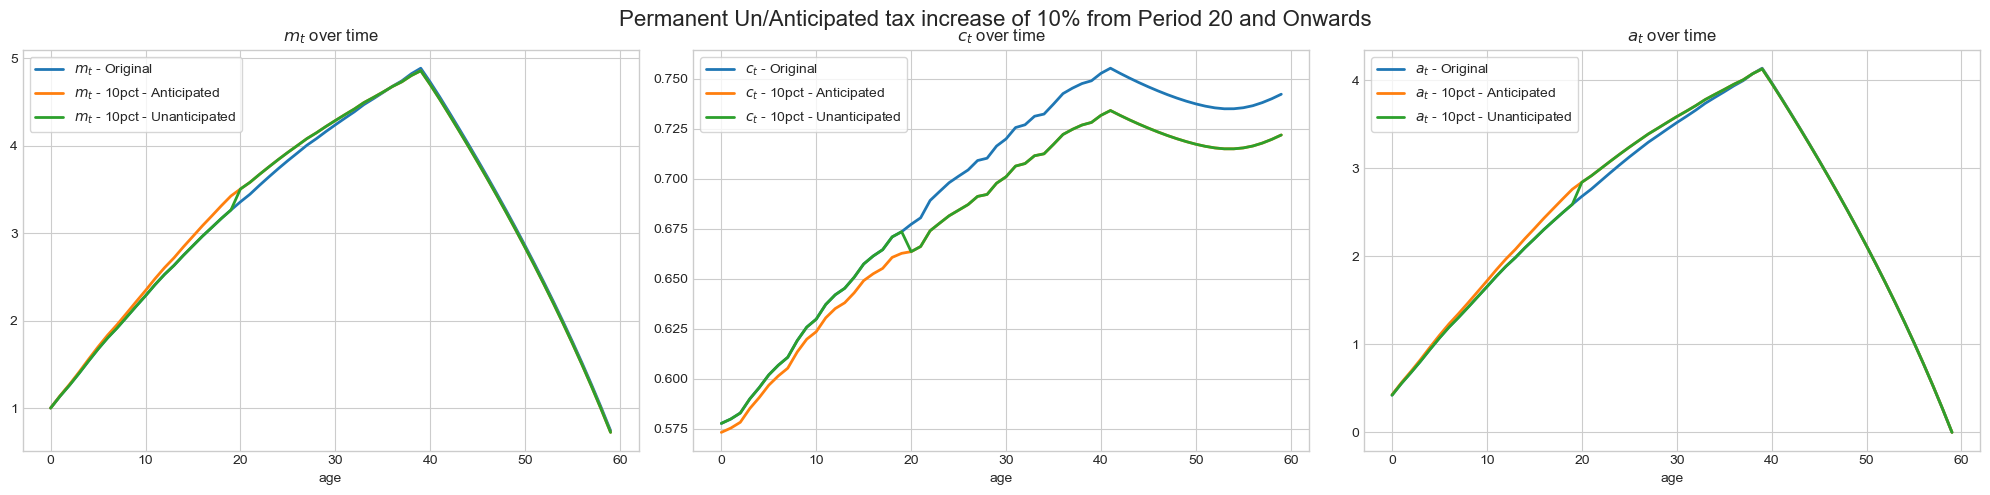

In [19]:
# a. unpack
par = model_negm.par
sim = model_negm.sim
sim_10pct = model_negm_10pct.sim
sim_unanticipated = model_unanticipated10pt.sim

simvarlist = [('m','$m_t$'),
              ('c','$c_t$'),
              ('a','$a_t$')]

# b. figure
fig, axs = plt.subplots(1, len(simvarlist), figsize=(20, 5))

# add a title over the entire figure
fig.suptitle("Permanent Un/Anticipated tax increase of 10% from Period 20 and Onwards", fontsize=16)

age = np.arange(par.T)

for i, (simvar,simvarlatex) in enumerate(simvarlist):

    simdata = getattr(sim, simvar+'_rand')
    simdata_10pct = getattr(sim_10pct, simvar+'_rand')
    simdata_unanticipated = getattr(sim_unanticipated, simvar+'_rand')  # data from combined model

    axs[i].plot(age, np.mean(simdata, axis=1), lw=2, label=f'{simvarlatex} - Original')
    axs[i].plot(age, np.mean(simdata_10pct, axis=1), lw=2, label=f'{simvarlatex} - 10pct - Anticipated')
    axs[i].plot(age, np.mean(simdata_unanticipated, axis=1), lw=2, label=f'{simvarlatex} - 10pct - Unanticipated')  # plot combined data

    axs[i].legend(frameon=True)
    axs[i].grid(True)
    axs[i].set_xlabel('age')
    axs[i].set_title(f'{simvarlatex} over time')

plt.tight_layout()
# Adjust the layout so that title does not overlap with the top plot
plt.subplots_adjust(top=0.9)
plt.show()

# Timings

**Time** the various solution methods and show the importance of the optimized computation of $q_t(p_t,a_t)$ in EGM (i.e. setting `do_simple_w = False`).

In [ ]:
t0 = time.time()
model = BufferStockModelClass(name='')
print(f'time to setup: {elapsed(t0)}')

In [ ]:
for solmethod in ['nvfi','egm','vfi']:    
    for do_simple_w in [True,False]:
        
        if solmethod == 'vfi' and do_simple_w: continue # skip this
    
        print(f'{solmethod}',end='')        
        
        if not solmethod == 'vfi':
            print(f' (do_simple_w = {do_simple_w})')
        else:
            print('')
        
        # a. change solution method
        model.par.solmethod = solmethod
        model.par.do_simple_w = do_simple_w
        model.par.do_print = False
    
        # b. test run 
        t0 = time.time()
        model.solve()
        model.par.do_print = True
        print(f'time in test run: {elapsed(t0)}')

        # c. final run
        t0 = time.time()
        model.solve()
        print(f'time in final run: {elapsed(t0)} [checksum: {model.checksum():.8f}]')
        print('')
        

## Test Parallelization

In [ ]:
threads_list = [x for x in np.arange(1,nb.config.NUMBA_NUM_THREADS+1) if x in [1,4,8] or x%8 == 0]

In [ ]:
solmethod = 'egm'
for do_simple_w in [False,True]:
    
    print(f'{solmethod} (do_simple_w = {do_simple_w}) ')
    
    for threads in threads_list:

        nb.set_num_threads(threads)
        
        # a. change solution method
        model.par.solmethod = solmethod
        model.par.do_simple_w = do_simple_w
        model.par.do_print = False

        # b. run
        t0 = time.time()
        model.solve()
        print(f' time to solve with {threads:2d} threads: {elapsed(t0)} [checksum: {model.checksum():.8f}]')
    
    print('')


**Conclusion:** Numba is not always parallizing that well. And using too many threads can even be harmful.